# US Adult Income

## 1. Introduction 



The US Adult Census Dataset was retrieved by Barry Becker from the 1994 US Census Database. There are a total of 15 columns in this dataset, 14 of these variables will contribute whether that individual makes an income of ">50K" or "<=50K" in a given year. The objective is to predict the "Income Bracket" which has two different outcomes, ">50K" or "<=50K" and obtain a classifier with great accuracy. The following dataset can be found from kaggle, https://www.kaggle.com/johnolafenwa/us-census-data#adult-training.csv 

## 2. Importing Data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics 

In [2]:
# There were no column names in the "adult-training.csv" file, thus  the following columns need to be added
columns = ['Age','Workclass','fnlwgt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Gender','Capital Gain','Capital Loss',
           'Hours Per Week','Native Country','Income Bracket']

train_df = pd.read_csv('us-census-data/adult-training.csv', names=columns)


## 3. Data Cleaning 

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education Num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Gender            32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours Per Week    32561 non-null int64
Native Country    32561 non-null object
Income Bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
train_df.head()

,Age,Workclass,fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education Num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Gender            32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours Per Week    32561 non-null int64
Native Country    32561 non-null object
Income Bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# There were no "nan" values found in this data other than "?", this will be converted to "nan" and then dropped from the dataset.
train = train_df.replace(' ?', np.nan).dropna()

In [7]:
train.drop('fnlwgt', axis=1, inplace=True)

In [8]:
train.describe()

,Age,Education Num,Capital Gain,Capital Loss,Hours Per Week
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238
std,13.134665,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## 4. Data Analysis

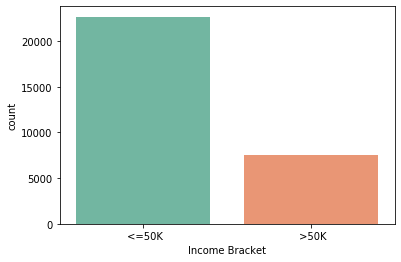

In [9]:
sns.countplot('Income Bracket', data=train, palette="Set2")

The figure above shows that there are far more individuals making <=50K than in comparison to >50K. Less than half make >50K. 

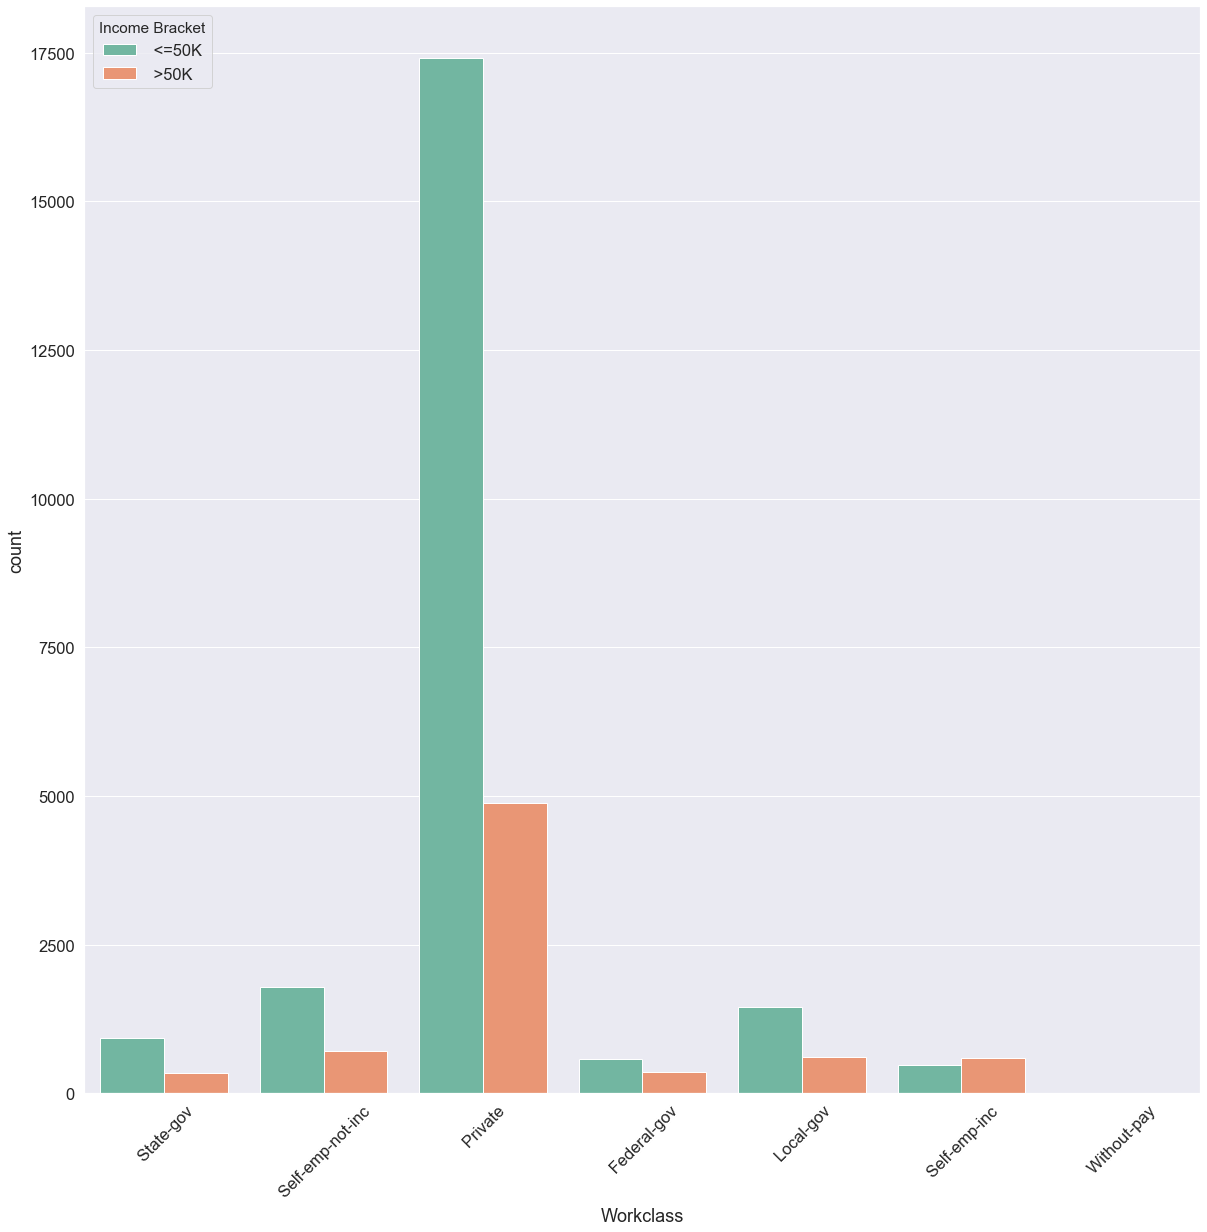

In [10]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.countplot('Workclass', hue='Income Bracket', data=train, palette="Set2")

The figure above shows that most people are working in the private sector. Self employed workers have more individuals making over 50K. In all the other working classes, there is a huge gap between <=50K and >50K, most people in these sectors make <=50K. 

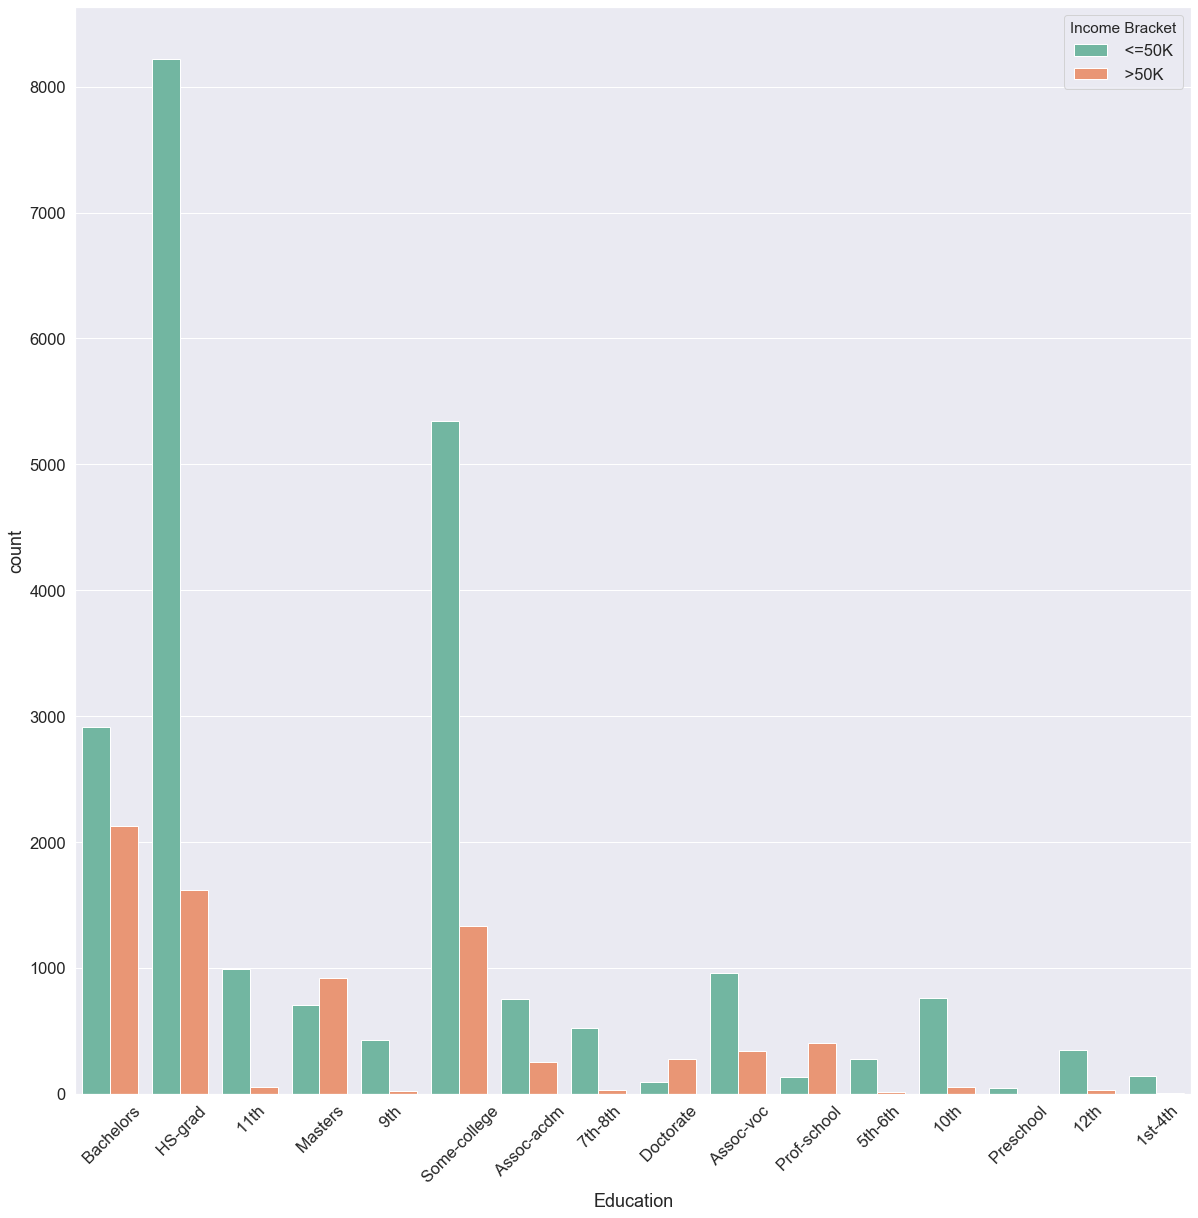

In [11]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.countplot('Education', hue='Income Bracket', data=train, palette="Set2")

From the figure above, most individuals from this dataset have an education of highschool or more. 

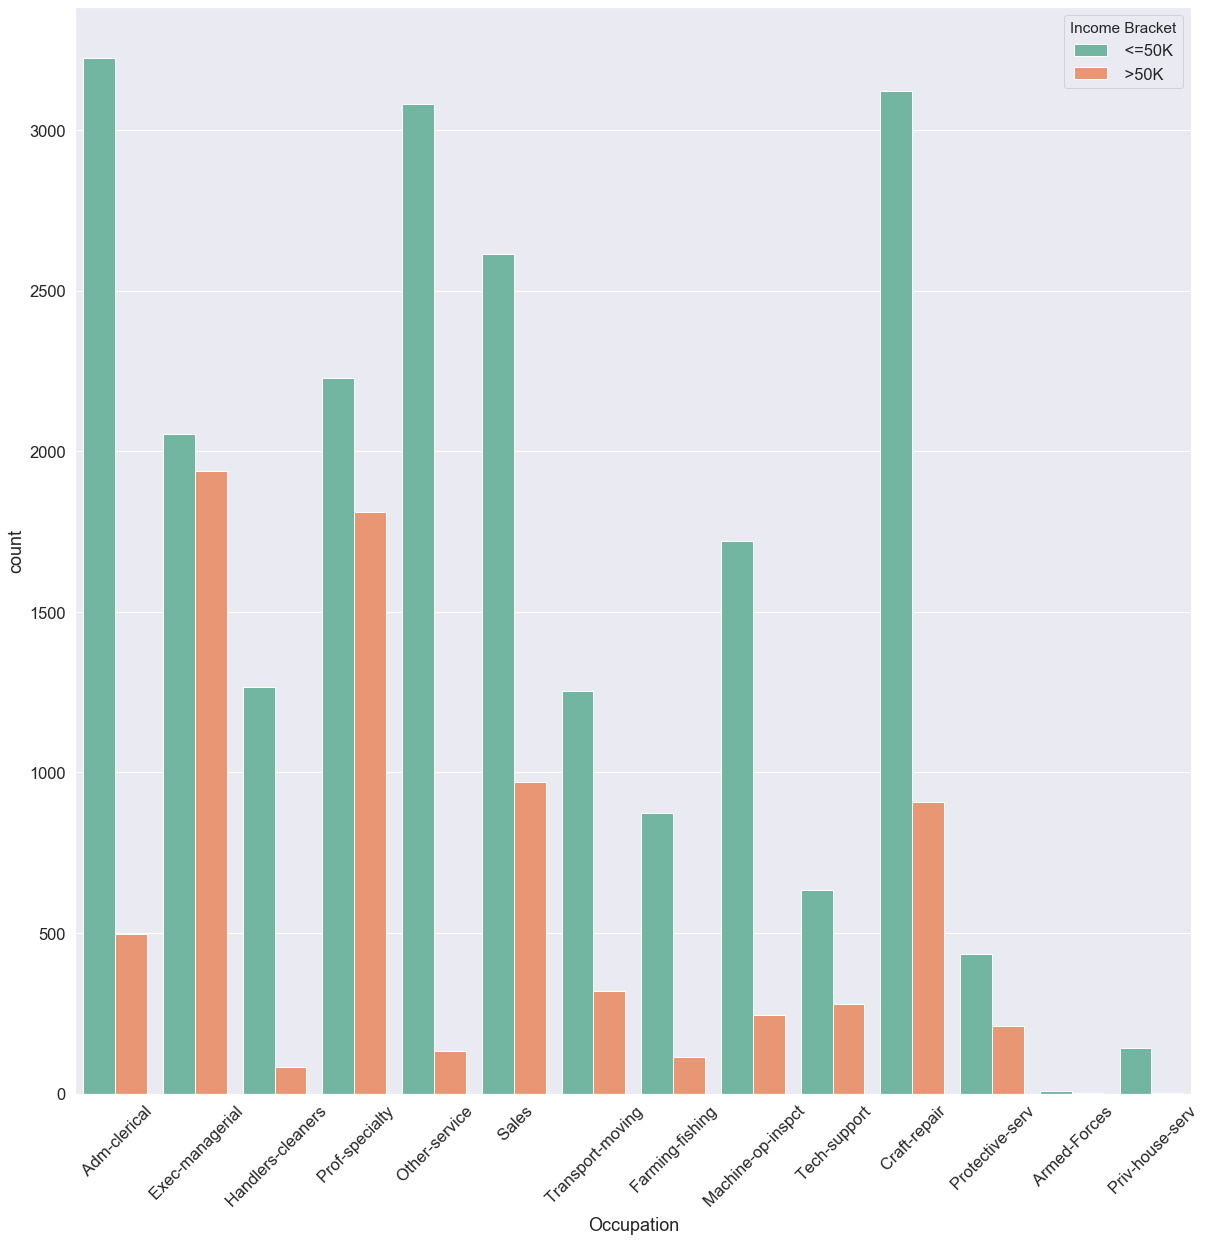

In [12]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.countplot('Occupation', hue='Income Bracket', data=train, palette="Set2")

The figure above shows the histogram of the different occupations in the dataset for incomes <=50K and >50K. Handlers-cleaners have the greatest difference of income. Exec-managerial has the least difference as there are far more people in this occupation making >50K. 

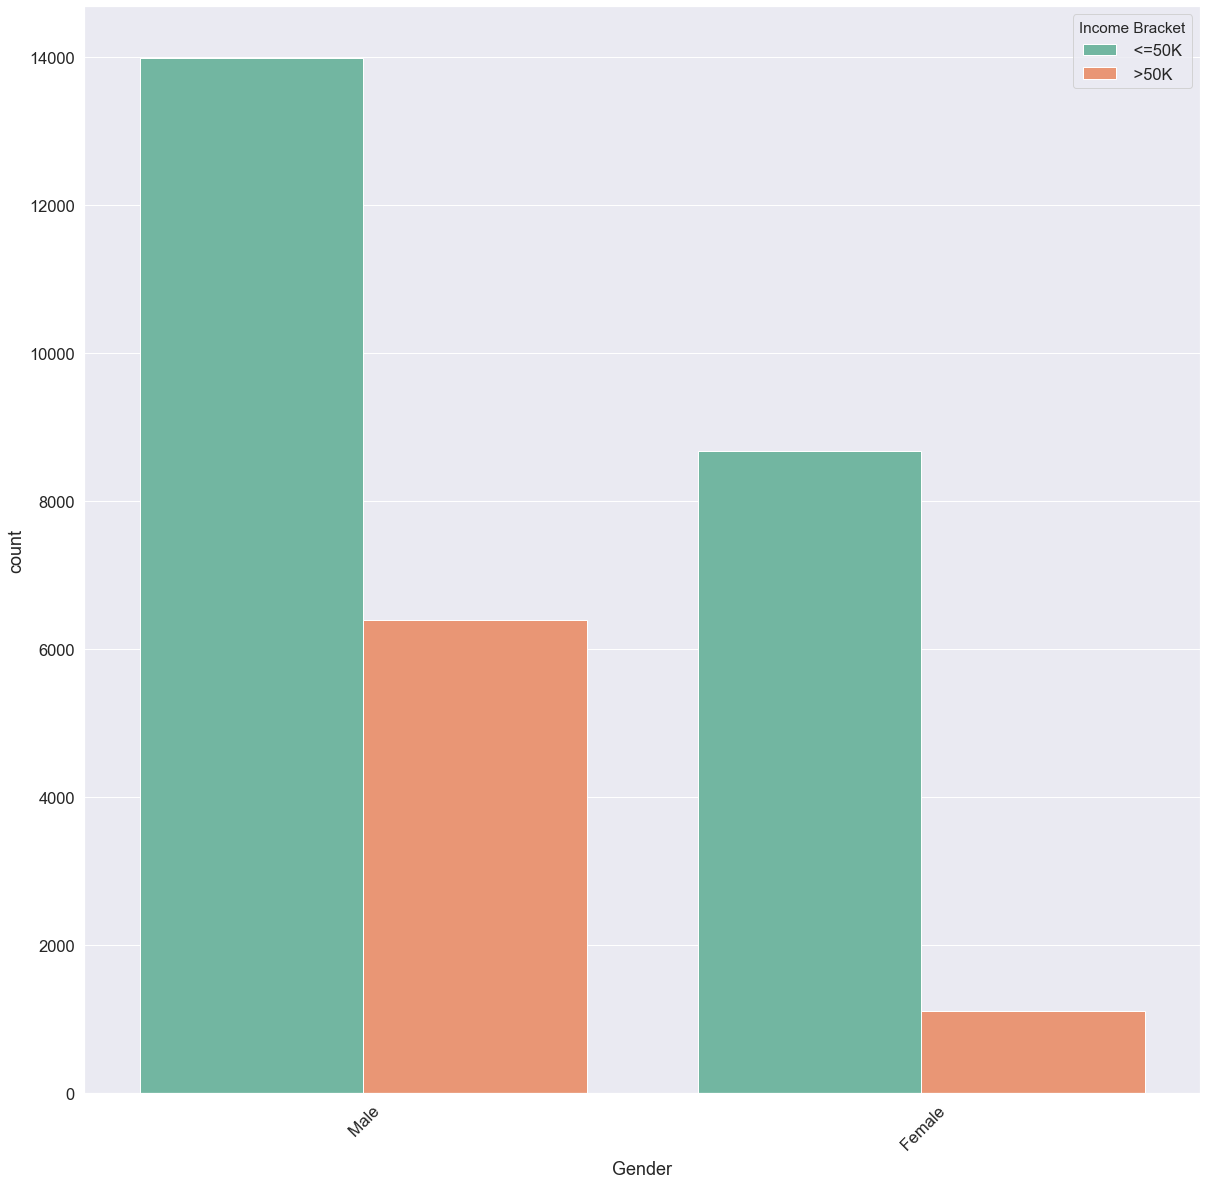

In [13]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.countplot('Gender', hue='Income Bracket', data=train, palette="Set2")

The figure above shows the histogram for males and females in the dataset for incomes <=50K and >50K. There are far less females in ratio making >50K in comparison to males.  

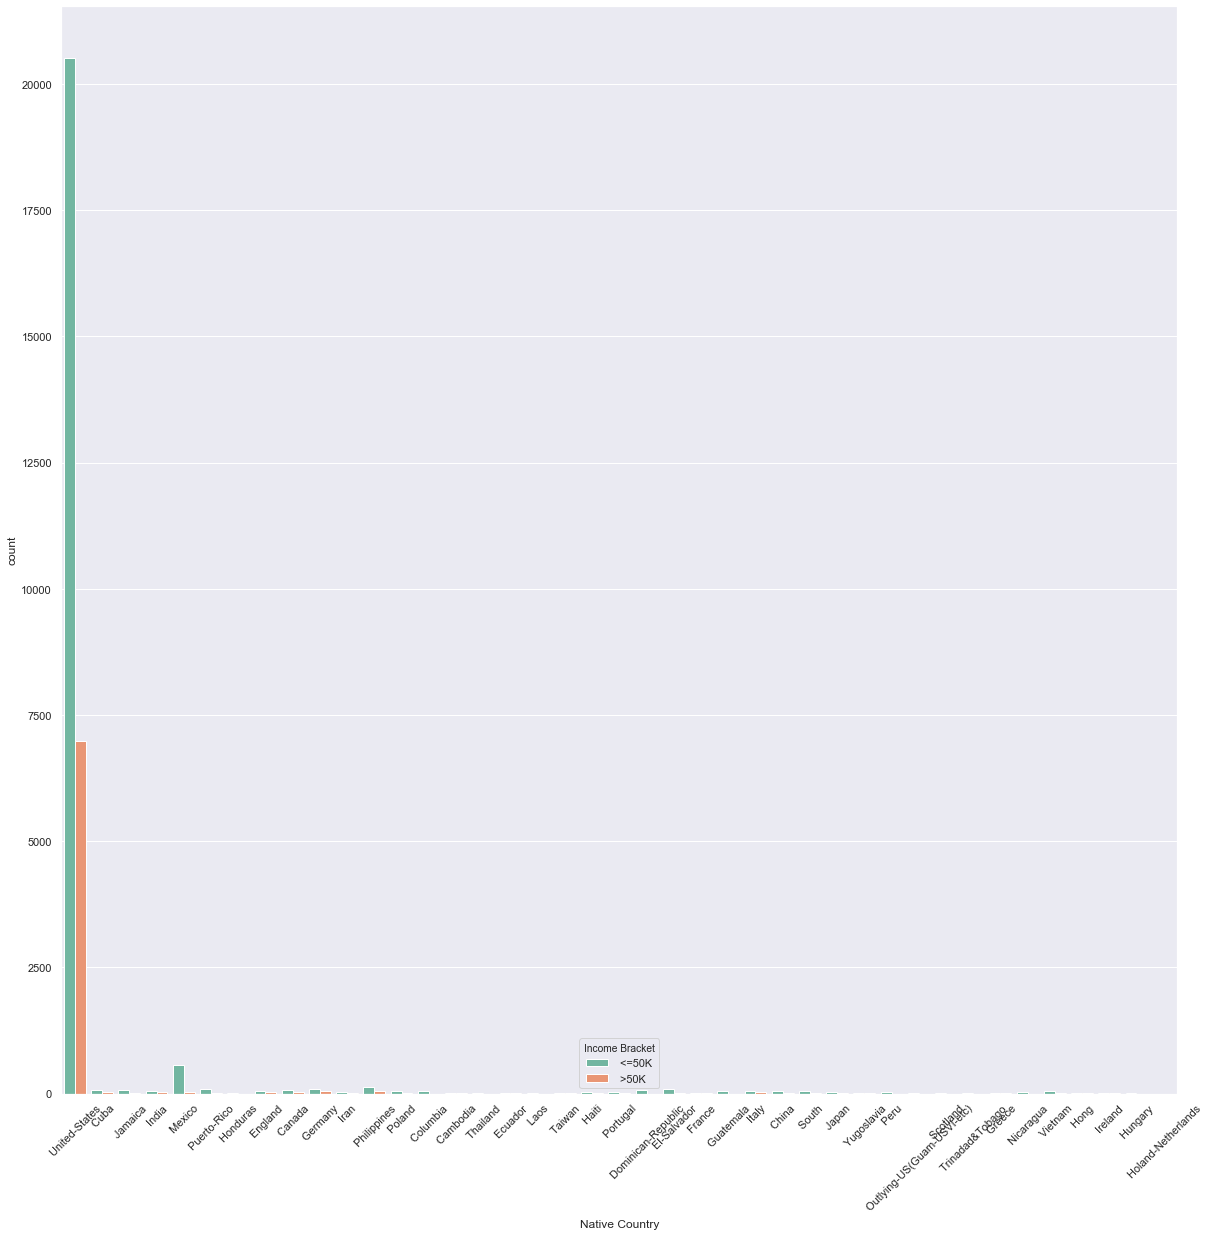

In [14]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.0)
plt.xticks(rotation=45)
sns.countplot('Native Country', hue='Income Bracket', data=train, palette="Set2")

The figure above shows the histogram for individuals and their native countires for incomes <=50K and >50K. Most individuals native country is United States and second highest is Mexico.

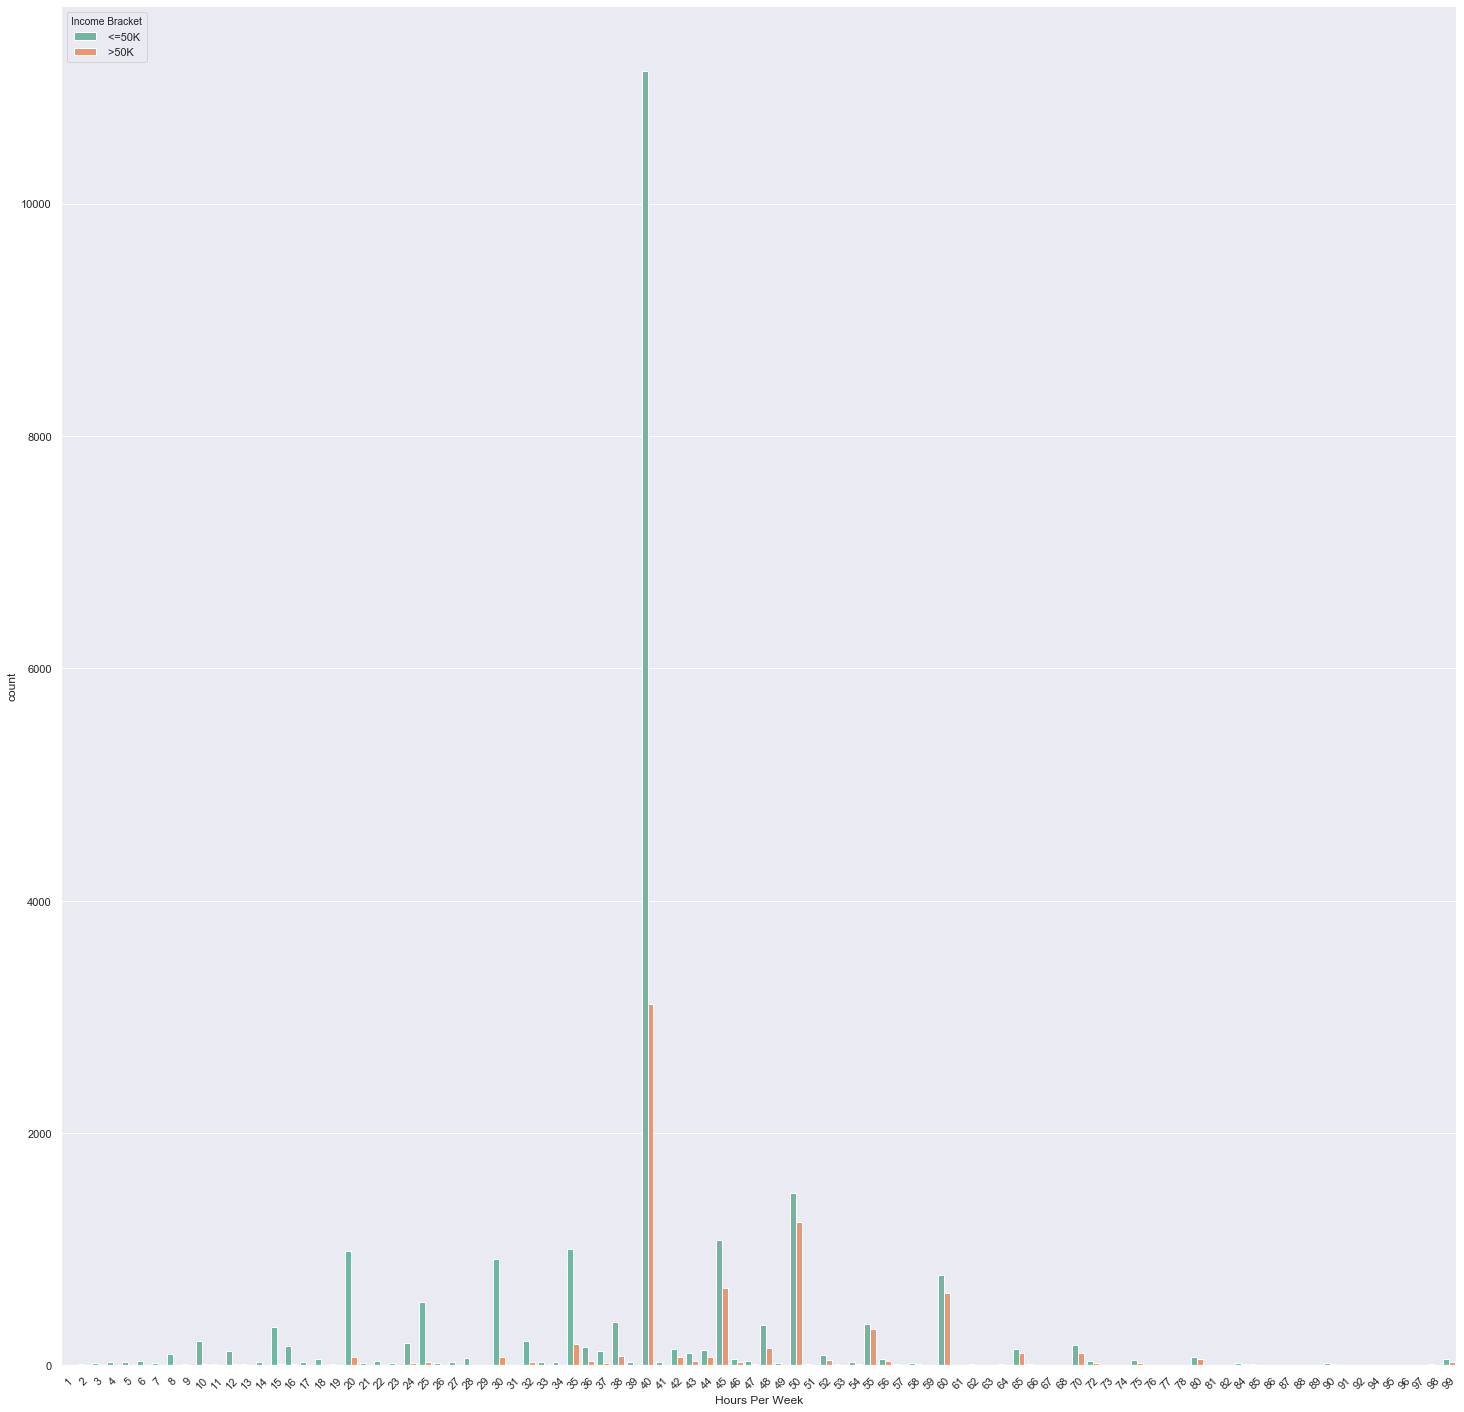

In [15]:
plt.figure(figsize=(25,25))
sns.set(font_scale=1.0)
plt.xticks(rotation=45)
sns.countplot('Hours Per Week', hue='Income Bracket', data=train, palette="Set2")

The figure above shows the histogram of the "Hours Per Week" in the dataset for incomes <=50K and >50K. Most individuals are working 40 hours per week. A large amount of individuals who make >50K seem to work 40 hours or more per week. 

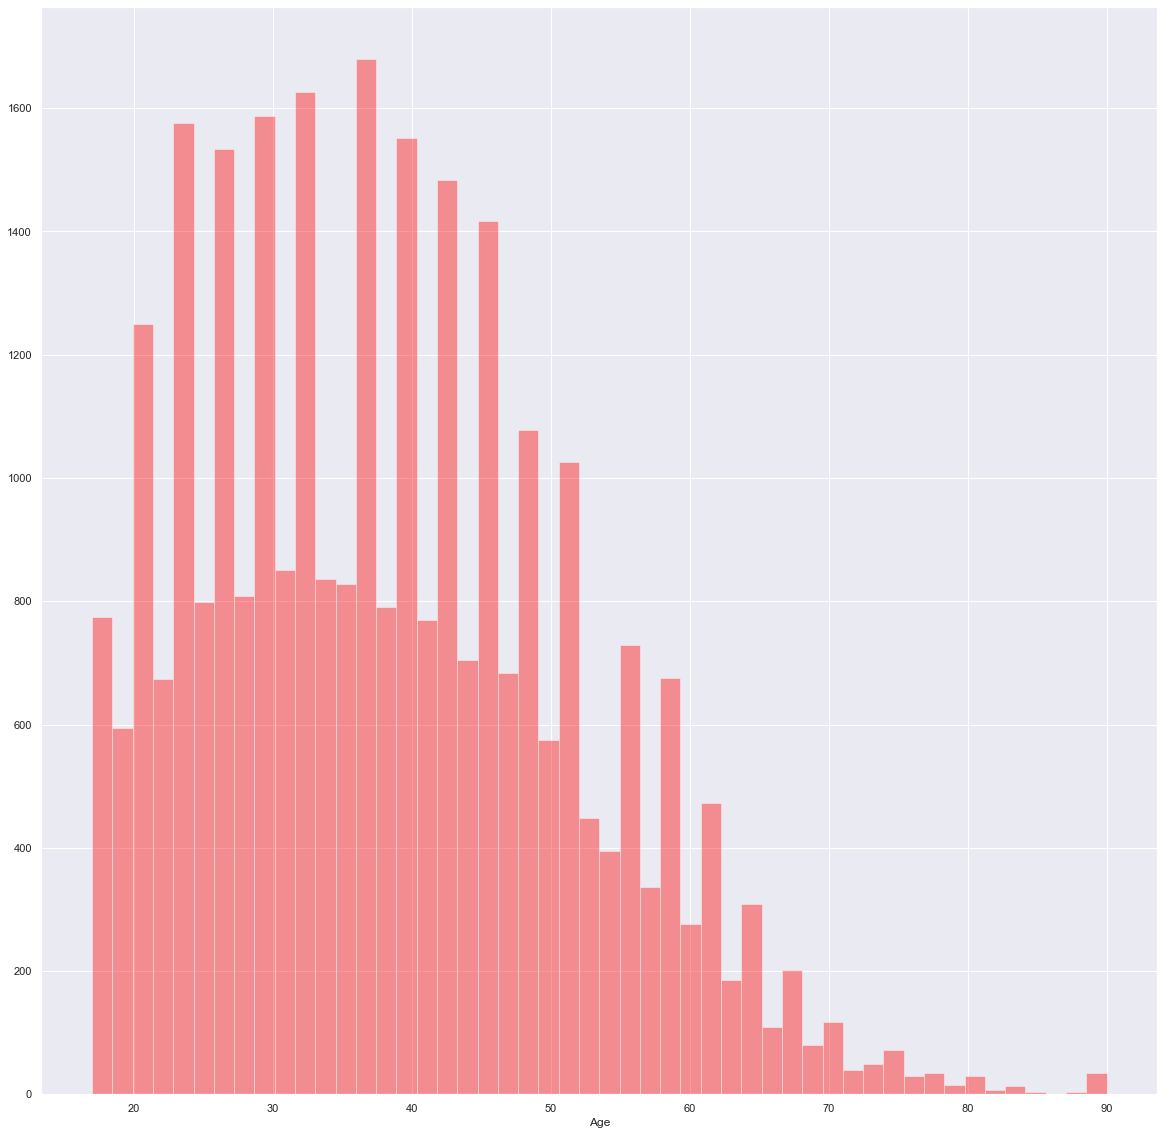

In [16]:
plt.figure(figsize=(20,20))
sns.distplot( train["Age"] , color="red", kde = False)

The figure above shows the histogram of the different ages in the dataset. There is a wide age gap in this dataset, from 17 years old to 90 years old.  

In [17]:
# The columns "Income Bracket" needs to be turned into binary (0 and 1) in order to use it for the correlation matrix  
y_train = train['Income Bracket']
train['Income Bracket'] = y_train.replace([' <=50K',' >50K' ] , [0,1] )

In [18]:
corr_matrix = train.corr()
corr_matrix

,Age,Education Num,Capital Gain,Capital Loss,Hours Per Week,Income Bracket
Age,1.000000,0.043526,0.080154,0.060165,0.101599,0.241998
Education Num,0.043526,1.000000,0.124416,0.079646,0.152522,0.335286
Capital Gain,0.080154,0.124416,1.000000,-0.032229,0.080432,0.221196
Capital Loss,0.060165,0.079646,-0.032229,1.000000,0.052417,0.150053
Hours Per Week,0.101599,0.152522,0.080432,0.052417,1.000000,0.229480
Income Bracket,0.241998,0.335286,0.221196,0.150053,0.229480,1.000000


The table above and the figure below shows a correlation matrix of the numerical variables in the dataset. The main focus is geared towards the Income Bracket and its correlation towards the other numerical variables. Education Num has the highest correlation while fnlwgt has the lowest correlation. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

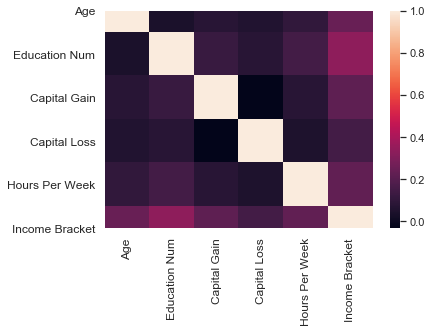

In [19]:
sns.heatmap(train.corr())
plt.xticks( fontsize=12)
plt.yticks( fontsize=12, rotation=360)

## 5. Machine Learning 

In [20]:
# This shows the total value counts of the converted ' <=50K' and ' >50K' to '0' and '1'
train['Income Bracket'].value_counts()

0    22654
1     7508
Name: Income Bracket, dtype: int64

In [21]:
# split data to X and y.
y = train['Income Bracket']
x = train.drop(['Income Bracket'], axis = 1, inplace=True )

In [22]:
# convert categorical variables into dummy variables. 
final_features = pd.get_dummies(train).reset_index(drop=True)
final_features.shape

(30162, 103)

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Split data into numerical and categorical inorder to scale the data.
num_col = ["Age", "Education Num", "Capital Gain", "Capital Loss", "Hours Per Week"]
cat_col = ["Workclass", "Education", "Marital Status", "Occupation", "Relationship", "Race", "Gender", "Native Country", "Income Bracket"]

# Scale the data using standard scaler.
scaler = StandardScaler()
final_features = scaler.fit_transform(final_features[num_col])

In [24]:
from sklearn.model_selection import train_test_split

# Split into train and test subsets. 
X_train, X_test, y_train, y_test = train_test_split(final_features, y, test_size=0.2, random_state=42)

In [25]:
# Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

clf_dtc = DecisionTreeClassifier()
clf_dtc = clf_dtc.fit(X_train,   y_train)

y_pred = clf_dtc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8085529587270015
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4503
           1       0.67      0.48      0.56      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.70      0.72      6033
weighted avg       0.80      0.81      0.80      6033



In [26]:
# Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
clf_lrm = LogisticRegression()
clf_lrm = clf_lrm.fit(X_train, y_train)

y_pred = clf_lrm.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8102105088678933
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4503
           1       0.73      0.40      0.52      1530

    accuracy                           0.81      6033
   macro avg       0.78      0.68      0.70      6033
weighted avg       0.80      0.81      0.79      6033



/Users/grannelpinto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
# Random Forest Classifier Model 
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier()
clf_rfc = clf_rfc.fit(X_train, y_train)

y_pred = clf_rfc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8143543842201226
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4503
           1       0.68      0.50      0.58      1530

    accuracy                           0.81      6033
   macro avg       0.76      0.71      0.73      6033
weighted avg       0.80      0.81      0.80      6033



/Users/grannelpinto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
# SVC Model
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc = clf_svc.fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/Users/grannelpinto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.8219791148682247
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4503
           1       0.80      0.40      0.53      1530

    accuracy                           0.82      6033
   macro avg       0.81      0.68      0.71      6033
weighted avg       0.82      0.82      0.80      6033



## 6. Model Tuning 

In [29]:
# Tune the SVC Model using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 10, 100],  
              'gamma': [1, 0.01, 0.001], 
              }

CV_svc = GridSearchCV(estimator=clf_svc, param_grid=param_grid, cv= 5)
CV_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 10, 100], 'gamma': [1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
y_pred = CV_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8252942151500083
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4503
           1       0.76      0.45      0.57      1530

    accuracy                           0.83      6033
   macro avg       0.80      0.70      0.73      6033
weighted avg       0.82      0.83      0.81      6033



Text(0.5, 0, 'Relative Importance')

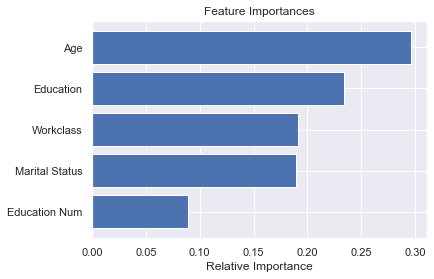

In [48]:
# Feature Importance will show which features provide the most predictive power on the dataset 
features= train.columns
importances = clf_rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## 7. Conclusion 
From the feature importances, Age had the most predictive power on the dataset. Out of the following classification models used, the SVC Model gave the best accuracy. After tuning the model using GridSearchCV I received an accuracy of 0.869.

## 8. Recommendations 

I recommend using more models in the future because it help compare and contrast. I also recommend using imblearn for future work, this will help over-sampling data such as the income bracket which has far more individual making <=50K than in comparison to >50K. 